In [0]:
import numpy as np
import math
from numpy import mean
from numpy import std
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr 
from matplotlib import pyplot
import matplotlib.pyplot as plt

## Question 1(a)

In [96]:
seed(209889)
x = np.random.randn(1000)
y = x**2 
print('x: mean=%.3f stdv=%.3f' % (mean(x), std(x)))
print('y: mean=%.3f stdv=%.3f' % (mean(y), std(y)))

x: mean=-0.011 stdv=0.987
y: mean=0.974 stdv=1.422


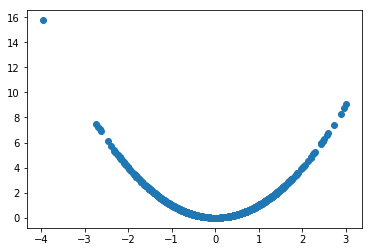

In [97]:
pyplot.scatter(x, y)
pyplot.show()

In [98]:
# calculate covariance matrix
covariance = cov(x, y)
print(covariance)

[[ 0.9747759  -0.06725518]
 [-0.06725518  2.02317894]]


In [99]:
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: -0.05


## Question 1(b):

Test for r = 1,-1,0.5,-0.5,0

In [100]:
seed(8)
x1 = np.random.randn(1000)
y1 = 90 * x1
y2 = 90 * (-x1)
y3 = 0.71*(x1 + np.random.randn(1000))+(0.29*(-x1 + np.random.randn(1000)))
y4 = (0.72*(-x1 + np.random.randn(1000)))+(0.28*(x1 + np.random.randn(1000)))
y5 = np.random.randn(1000)
print('x1: mean=%.3f stdv=%.3f' % (mean(x1), std(x1)))
print('y1: mean=%.3f stdv=%.3f' % (mean(y1), std(y1)))
print('y2: mean=%.3f stdv=%.3f' % (mean(y2), std(y2)))
print('y3: mean=%.3f stdv=%.3f' % (mean(y3), std(y3)))
print('y4: mean=%.3f stdv=%.3f' % (mean(y4), std(y4)))
print('y5: mean=%.3f stdv=%.3f' % (mean(y5), std(y5)))

x1: mean=0.037 stdv=1.022
y1: mean=3.362 stdv=91.944
y2: mean=-3.362 stdv=91.944
y3: mean=0.046 stdv=0.879
y4: mean=-0.058 stdv=0.902
y5: mean=-0.034 stdv=0.976


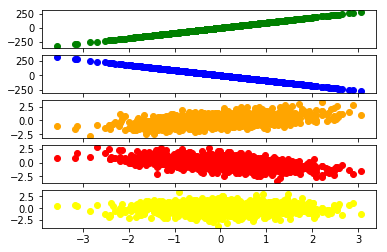

In [101]:
plt.subplot(5,1,1)
plt.scatter(x1, y1, color= 'g')

plt.subplot(5,1,2)
plt.scatter(x1, y2, color= 'b')

plt.subplot(5,1,3)
plt.scatter(x1, y3, color= 'orange')

plt.subplot(5,1,4)
plt.scatter(x1, y4, color= 'r')

plt.subplot(5,1,5)
plt.scatter(x1, y5, color= 'yellow')
plt.show()

In [102]:
# calculate covariance matrix
covariance1 = cov(x1, y1)
covariance2 = cov(x1, y2)
covariance3 = cov(x1, y3)
covariance4 = cov(x1, y4)
covariance5 = cov(x1, y5)
print(covariance1)
print(covariance2)
print(covariance3)
print(covariance4)
print(covariance5)

[[1.04471166e+00 9.40240495e+01]
 [9.40240495e+01 8.46216446e+03]]
[[ 1.04471166e+00 -9.40240495e+01]
 [-9.40240495e+01  8.46216446e+03]]
[[1.04471166 0.45659372]
 [0.45659372 0.77291906]]
[[ 1.04471166 -0.46736875]
 [-0.46736875  0.81481888]]
[[ 1.04471166 -0.01556451]
 [-0.01556451  0.95426737]]


In [103]:
corr1, _ = pearsonr(x1, y1)
corr2, _ = pearsonr(x1, y2)
corr3, _ = pearsonr(x1, y3)
corr4, _ = pearsonr(x1, y4)
corr5, _ = pearsonr(x1, y5)
print('Pearsons correlation1: %.3f' % corr1)
print('Pearsons correlation2: %.3f' % corr2)
print('Pearsons correlation3: %.3f' % corr3)
print('Pearsons correlation4: %.3f' % corr4)
print('Pearsons correlation5: %.3f' % corr5)

Pearsons correlation1: 1.000
Pearsons correlation2: -1.000
Pearsons correlation3: 0.508
Pearsons correlation4: -0.507
Pearsons correlation5: -0.016


## Question 1(c) 

Z = X + Y + Rnd

In [0]:
seed(34)
X = np.random.randn(1000)
Y = np.random.randn(1000)
Z = X + Y + np.random.randn(1000)

In [105]:
covar_xy = cov(X, Y)
covar_xz = cov(X, Z)
print(covar_xy)
print(covar_xz)

[[0.93360212 0.05422843]
 [0.05422843 1.0331159 ]]
[[0.93360212 0.98560914]
 [0.98560914 3.11008073]]


In [106]:
corr_xy, _ = pearsonr(X, Y)
corr_xz, _ = pearsonr(X, Z)
print('Pearsons correlation X&Y: %.3f' % corr_xy)
print('Pearsons correlation X&Z: %.3f' % corr_xz)

Pearsons correlation X&Y: 0.055
Pearsons correlation X&Z: 0.578


## Question 2

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display, Math, Latex
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

In [0]:
X,Y = make_blobs(n_samples=500, centers=4, n_features=3,random_state = 0)

In [109]:
print(X.shape)
print(Y.shape)

(500, 3)
(500,)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify = Y, random_state=42)

In [111]:
# Set up PCA and logistic regression model
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', solver='liblinear')

# Fit and transform training data, given on PCA reduction to k(=2) principle components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# solves task, given 3 classes (as from y_train) 
lr.fit(X_train_pca, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
def plot_decision_regions(X, y, classifier, resolution=0.04):
    # Does not work....always....Setup marker generator and color map: FIXED!
    markers = ('s', 'v', 'o','d') 
    colors = ('r', 'b', 'g','orange')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Z is the prediction of the class, given point in plane
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # Z=f(xx1,yy1), plot classes in plane using color map but opaque
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot data points, given labels
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(xs=X[y == cl, 0], 
                    ys=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)],s=150,
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

## 2(a) 

Make 4 blobs

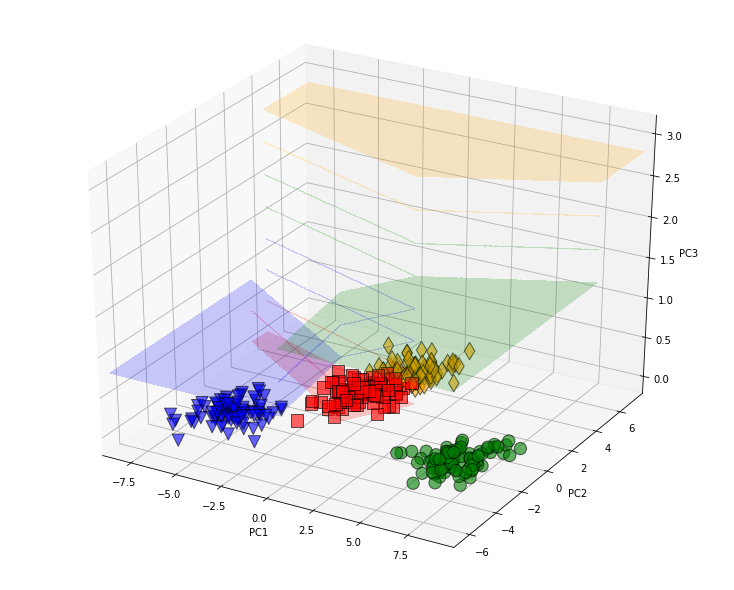

In [113]:
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
plot_decision_regions(X_train_pca, y_train, classifier=lr)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

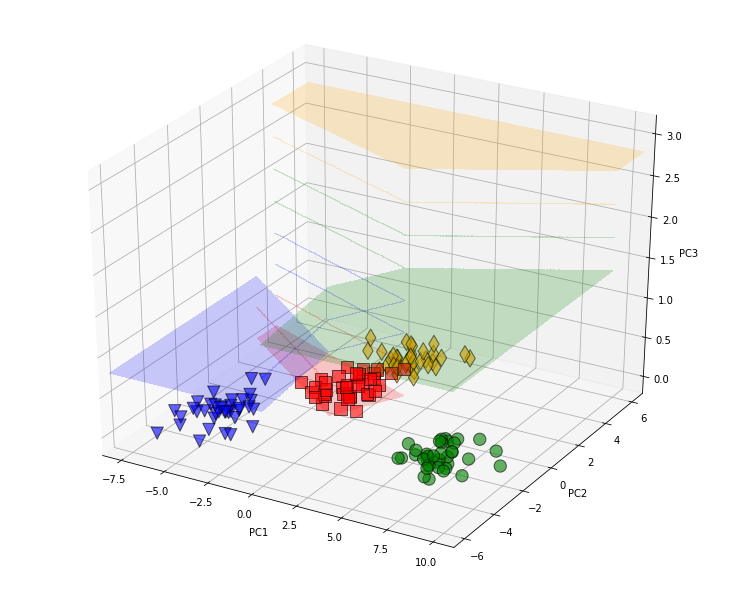

In [114]:
# plot decision regions for test set
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
plot_decision_regions(X_test_pca, y_test, classifier=lr)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

## 2(b)

2 touching parabola spread

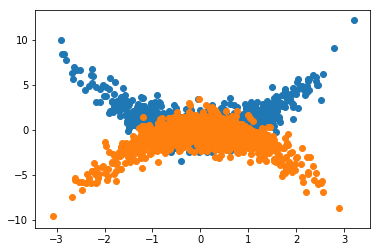

In [115]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
seed(9)
x_1 = np.random.randn(1000)
y_1 = (x_1**2 + np.random.randn(1000))

x_2 = np.random.randn(1000)
y_2 = -((x_2**2) + np.random.randn(1000))

pyplot.scatter(x_1, y_1)
pyplot.scatter(x_2, y_2)

pyplot.show()

In [121]:
X = pd.DataFrame(np.hstack((x_1,x_2)))
Y = pd.DataFrame(np.hstack((y_1,y_2)))
c1 = np.zeros(1000)
c2 = np.ones(1000)
Z = pd.DataFrame(np.hstack((c1,c2)))
Z.shape

(2000, 1)

In [122]:
df = pd.DataFrame(np.column_stack((X,Y,Z)))
df.shape

(2000, 3)

In [0]:
train,test = df.iloc[:, 0:2].values, df.iloc[:, 2].values

In [0]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3,stratify = test, random_state=0)

In [0]:
# Standardize the features (zero mean, unit variance) 
sc = StandardScaler()

# Fit results must be used later (mu and sigma)
X_train_std = sc.fit_transform(X_train) 

# Normalize test data set with mu/sigma of training data
X_test_std = sc.transform(X_test)

In [140]:
X_train_std

array([[ 0.1339588 ,  0.31990353],
       [-0.94651227, -0.01419172],
       [ 0.58627313,  1.44371558],
       ...,
       [ 0.9450803 , -0.66179455],
       [ 0.17516139,  0.11297915],
       [ 0.02782658,  0.10854787]])

In [141]:
# Set up PCA and logistic regression model
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', solver='liblinear')

# Fit and transform training data, given on PCA reduction to k(=2) principle components
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# solves task, given 3 classes (as from y_train) 
lr.fit(X_train_pca, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

No handles with labels found to put in legend.


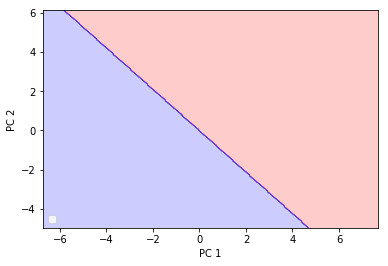

In [142]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

No handles with labels found to put in legend.


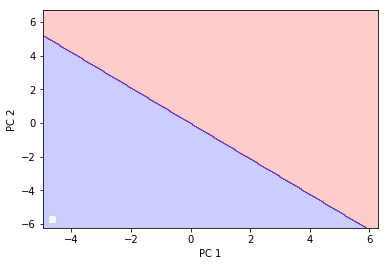

In [143]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

## Question 3(a)

In [0]:
from sklearn.cluster import KMeans

In [0]:
# Generate some random but clustered data
X1, y1 = make_blobs(
    n_samples=300, n_features=2,
    centers=4, cluster_std=0.45,
    random_state=0)

X2, y2 = make_blobs(
    n_samples=300, n_features=2,
    centers=4, cluster_std=0.90,
    random_state=0)

# Plot
plt.scatter(
    X1[:, 0], X1[:, 1],
    color='r', marker='o', edgecolor='black', s=150, alpha=0.3)
plt.show()

In [0]:
# K Means Parameters
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
# Call K mean prediction 
y_km = km.fit_predict(X1)

In [0]:
# Plot clusters
plt.scatter(
    X1[y_km == 0, 0], X1[y_km == 0, 1],
    s=50, color='red', alpha=0.3,
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X1[y_km == 1, 0], X1[y_km == 1, 1],
    s=50, color='green', alpha=0.3,
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X1[y_km == 2, 0], X1[y_km == 2, 1],
    s=50, color='blue', alpha=0.3,
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    X1[y_km == 3, 0], X1[y_km == 3, 1],
    s=50, color='orange', alpha=0.3,
    marker='v', edgecolor='black',
    label='cluster 4'
)
# plot centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='cyan', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [0]:
# Calculate distortion (SSE) for a range of number of cluster k
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X1)
    distortions.append(km.inertia_)

# Plot the elbow (if any)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## 3(b)

In [0]:
# Plot the data generated
plt.scatter(
    X2[:, 0], X2[:, 1],
    color='r', marker='o', edgecolor='black', s=150, alpha=0.3)
plt.show()

In [0]:
# K Means Parameters
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
# Call K mean prediction 
y_km1 = km.fit_predict(X2)

In [0]:
# Plot clusters
plt.scatter(
    X2[y_km1 == 0, 0], X2[y_km1 == 0, 1],
    s=50, color='red', alpha=0.3,
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X2[y_km1 == 1, 0], X2[y_km1 == 1, 1],
    s=50, color='green', alpha=0.3,
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X2[y_km1 == 2, 0], X2[y_km1 == 2, 1],
    s=50, color='blue', alpha=0.3,
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    X2[y_km1 == 3, 0], X2[y_km1 == 3, 1],
    s=50, color='orange', alpha=0.3,
    marker='v', edgecolor='black',
    label='cluster 4'
)
# plot centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='cyan', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [0]:
# Calculate distortion (SSE) for a range of number of cluster k
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X2)
    distortions.append(km.inertia_)

# Plot the elbow (if any)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()